# Project Heart Disease Dataset

Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df = pd.read_csv("Heart_Disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
#as we know that 0 is absence of heart disease and 1,2,3,4 are presence of heart disease.so we can convert them to 1 or 0.
df['num'] = df.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [4]:
#checking the data types 
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [5]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [6]:
#as the values in the ca column are not known we can drop that column
df.drop("ca",axis=1,inplace = True)

In [7]:
df.shape

(200, 13)

In [8]:
df = df.replace('?', np.NaN)

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,1
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,1
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,6,1
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,0


In [10]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
thal        166
num           0
dtype: int64

In [11]:
#in the "thal" column the missing values are more. so we can drop it
df.drop("thal",axis=1,inplace = True)

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,1
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,1
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,1
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,0


In [13]:
#convert the column into numeric data type
df['trestbps']= df['trestbps'].astype(float)
df['chol']= df['chol'].astype(float)
df['fbs']= df['fbs'].astype(float)
df['thalach']= df['thalach'].astype(float)
df['exang']= df['exang'].astype(float)
df['oldpeak']= df['oldpeak'].astype(float)
df['slope']= df['slope'].astype(float)


In [14]:
#statistical summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,98.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.745000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,0.667937,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,1.000000


#observation
1. there are some missing values in the columns trestbps,chol,thalach,exang,oldpeak,slope.
2. there could be outliers in the column chol. we will validate this further.
3. in the column chol the mean is less than median value.

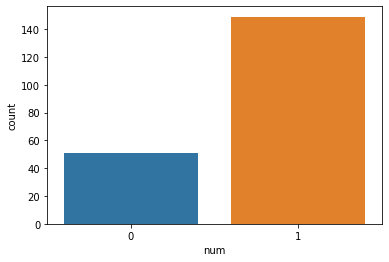

In [15]:
#plot of target 
sns.countplot(x="num",data =df)
plt.show()

#the plot shows that there less people suffering ffrom heart disease.

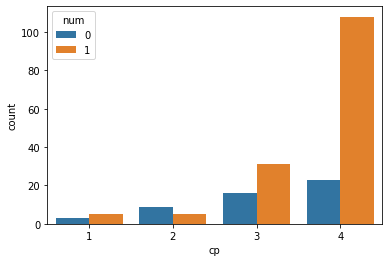

In [16]:
#plot of target wrt cp
sns.countplot(x= 'cp',data=df,hue='num')
plt.show()

#the plot shows that people with chest pain 4 are more prone to heart disease

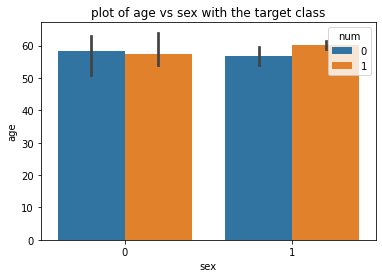

In [17]:
#plot of target wrt age and sex
sns.barplot(data = df, y = 'age', x = 'sex', hue = 'num')
plt.title('plot of age vs sex with the target class')
plt.show()

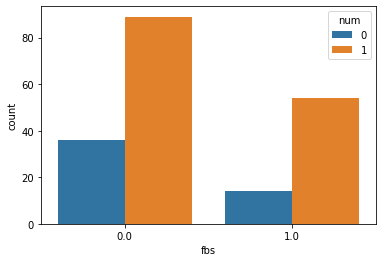

In [18]:
#plot of target wrt fbs
sns.countplot(x= 'fbs',hue="num",data = df)
plt.show()

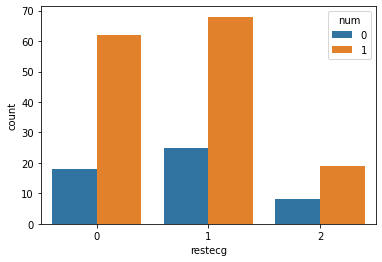

In [19]:
#plot of target wrt restecg
sns.countplot(x= 'restecg',hue="num",data = df)
plt.show()

#the plots shows that restecg with type 0 & 1 are suffering from heart disease compared to type 2.

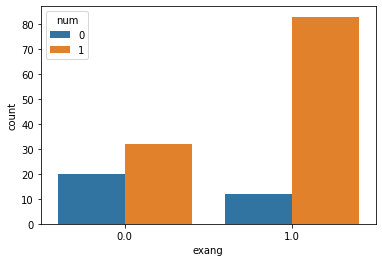

In [20]:
#plot of target wrt exang
sns.countplot(x= 'exang',hue="num",data = df)
plt.show()

#the plot shows that the exang with type 1 are suffering from heart disease more as compared to type 0.

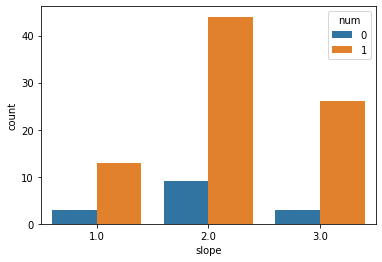

In [21]:
#plot of target wrt slope
sns.countplot(x= 'slope',hue="num",data = df)
plt.show()

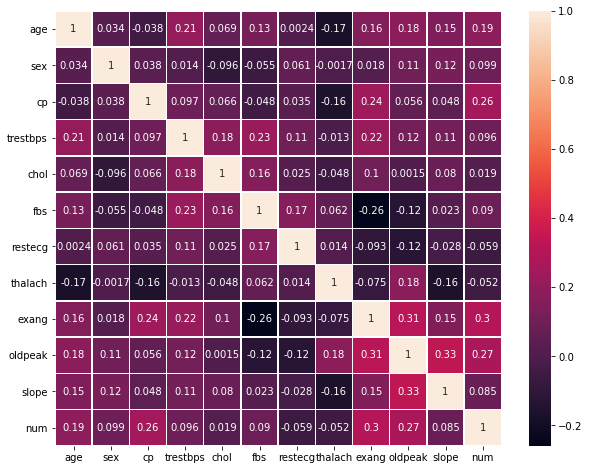

In [22]:
dfcorr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr,annot = True,linewidth = 0.5)

#observation
1.all the columns are weakly correlated with target column i.e 'num'.

In [23]:
#finding the unique values 
print(df['fbs'].unique())
print(df['cp'].unique())
print(df['slope'].unique())
print(df['exang'].unique())

[ 0.  1. nan]
[4 3 2 1]
[ 2. nan  3.  1.]
[ 1.  0. nan]


In [24]:
#filling the null values of the dataset
df['trestbps'] = df.trestbps.fillna(df.trestbps.mean())
df['chol'] = df.chol.fillna(df.chol.mean())
df['thalach'] = df.thalach.fillna(df.thalach.mean())
df['oldpeak'] = df.oldpeak.fillna(df.oldpeak.mean())

In [25]:
df['fbs'].value_counts()

0.0    125
1.0     68
Name: fbs, dtype: int64

In [26]:
df['exang'].value_counts()

1.0    95
0.0    52
Name: exang, dtype: int64

In [27]:
df['slope'].value_counts()

2.0    53
3.0    29
1.0    16
Name: slope, dtype: int64

In [28]:
#replacing the nullvalues with most repeated value
df['fbs'] = df['fbs'].replace(np.NaN,0.0)
df['exang'] = df['exang'].replace(np.NaN,1.0)
df['slope'] = df['slope'].replace(np.NaN,2.0)

In [29]:
#checking again for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [30]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 3
new_df = df[(z<3).all(axis=1)]

In [31]:
print(df.shape)
new_df.shape

(200, 12)


(181, 12)

In [32]:
#check the skewness
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.423414
slope       0.210521
num        -1.132724
dtype: float64

#### preparing dataset for training

In [33]:
x = df.drop("num",axis=1)
y = df['num']

In [34]:
print(x.shape)
print(y.shape)

(200, 11)
(200,)


In [35]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledx = sc.fit_transform(x)

##### finding the best model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix

In [37]:
#we have built a function of model 
def max_aucroc_score(clf,scaledx,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(scaledx, y,random_state = r_state,test_size=0.2)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [38]:
lg=LogisticRegression()
max_aucroc_score(lg,scaledx,y)

auc roc score corresponding to  42  is  0.640625
auc roc score corresponding to  43  is  0.6018808777429467
auc roc score corresponding to  44  is  0.5627240143369175
auc roc score corresponding to  45  is  0.5846394984326019
auc roc score corresponding to  46  is  0.49725274725274726
auc roc score corresponding to  47  is  0.6018808777429467
auc roc score corresponding to  48  is  0.567398119122257
auc roc score corresponding to  49  is  0.48290598290598286
auc roc score corresponding to  50  is  0.5232974910394265
auc roc score corresponding to  51  is  0.5654761904761905
auc roc score corresponding to  52  is  0.5413105413105412
auc roc score corresponding to  53  is  0.5454545454545454
auc roc score corresponding to  54  is  0.683982683982684
auc roc score corresponding to  55  is  0.5564263322884012
auc roc score corresponding to  56  is  0.5304659498207885
auc roc score corresponding to  57  is  0.6344086021505376
auc roc score corresponding to  58  is  0.6021505376344086
auc roc

76

In [39]:
#lets use cross_val_score
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg,scaledx,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg,scaledx,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg,scaledx,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.720637408568443
standard deviation in roc auc score for logistic classifier:  0.06615968625934952
[0.64       0.82666667 0.68666667 0.76333333 0.68652038]


In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
max_aucroc_score(dtc,scaledx,y)

auc roc score corresponding to  42  is  0.546875
auc roc score corresponding to  43  is  0.5156739811912225
auc roc score corresponding to  44  is  0.482078853046595
auc roc score corresponding to  45  is  0.7601880877742947
auc roc score corresponding to  46  is  0.6181318681318682
auc roc score corresponding to  47  is  0.6974921630094044
auc roc score corresponding to  48  is  0.44043887147335425
auc roc score corresponding to  49  is  0.4658119658119658
auc roc score corresponding to  50  is  0.521505376344086
auc roc score corresponding to  51  is  0.5833333333333333
auc roc score corresponding to  52  is  0.4857549857549857
auc roc score corresponding to  53  is  0.658307210031348
auc roc score corresponding to  54  is  0.6082251082251082
auc roc score corresponding to  55  is  0.6300940438871474
auc roc score corresponding to  56  is  0.521505376344086
auc roc score corresponding to  57  is  0.5931899641577061
auc roc score corresponding to  58  is  0.6720430107526882
auc roc sc

67

In [41]:
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dtc,scaledx,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dtc,scaledx,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dtc,scaledx,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.622110762800418
standard deviation in auc roc score for decision tree classifier:  0.060038560197826746
[0.68333333 0.68333333 0.76666667 0.53333333 0.4984326 ]


In [42]:
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(knn, neighbors, cv=5,scoring="roc_auc")
clf.fit(scaledx,y)
clf.best_params_

{'n_neighbors': 6}

In [43]:
knn=KNeighborsClassifier(n_neighbors=6)
max_aucroc_score(knn,scaledx,y)

auc roc score corresponding to  42  is  0.671875
auc roc score corresponding to  43  is  0.5956112852664577
auc roc score corresponding to  44  is  0.7204301075268817
auc roc score corresponding to  45  is  0.7100313479623825
auc roc score corresponding to  46  is  0.8021978021978022
auc roc score corresponding to  47  is  0.8009404388714734
auc roc score corresponding to  48  is  0.6410658307210031
auc roc score corresponding to  49  is  0.5982905982905983
auc roc score corresponding to  50  is  0.6093189964157706
auc roc score corresponding to  51  is  0.75
auc roc score corresponding to  52  is  0.5242165242165242
auc roc score corresponding to  53  is  0.7100313479623825
auc roc score corresponding to  54  is  0.8831168831168832
auc roc score corresponding to  55  is  0.7210031347962382
auc roc score corresponding to  56  is  0.6415770609318997
auc roc score corresponding to  57  is  0.6971326164874553
auc roc score corresponding to  58  is  0.6810035842293907
auc roc score corresp

54

In [44]:
#lets check cross_val_score
print("Mean auc roc score for KNN classifier: ",cross_val_score(knn,scaledx,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for KNN classifier: ",cross_val_score(knn,scaledx,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(knn,scaledx,y,cv=5,scoring="roc_auc"))

Mean auc roc score for KNN classifier:  0.7636530825496342
standard deviation in auc roc score for KNN classifier:  0.08226429046849132
[0.68333333 0.91833333 0.73666667 0.76833333 0.71159875]


In [45]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(scaledx,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [46]:
svc=SVC(kernel="linear",C=10)
max_aucroc_score(svc,scaledx,y)

auc roc score corresponding to  42  is  0.5625
auc roc score corresponding to  43  is  0.5109717868338558
auc roc score corresponding to  44  is  0.546594982078853
auc roc score corresponding to  45  is  0.5
auc roc score corresponding to  46  is  0.5
auc roc score corresponding to  47  is  0.5
auc roc score corresponding to  48  is  0.5391849529780564
auc roc score corresponding to  49  is  0.48148148148148145
auc roc score corresponding to  50  is  0.5232974910394265
auc roc score corresponding to  51  is  0.5
auc roc score corresponding to  52  is  0.48290598290598286
auc roc score corresponding to  53  is  0.5
auc roc score corresponding to  54  is  0.5
auc roc score corresponding to  55  is  0.5
auc roc score corresponding to  56  is  0.4910394265232975
auc roc score corresponding to  57  is  0.578853046594982
auc roc score corresponding to  58  is  0.46774193548387094
auc roc score corresponding to  59  is  0.5598290598290598
auc roc score corresponding to  60  is  0.556277056277

75

In [47]:
#Lets use Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(scaledx,y)
clf.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [48]:
gb_clf=GradientBoostingClassifier(learning_rate=1,n_estimators=500)
max_aucroc_score(gb_clf,scaledx,y)

auc roc score corresponding to  42  is  0.421875
auc roc score corresponding to  43  is  0.5846394984326019
auc roc score corresponding to  44  is  0.5304659498207885
auc roc score corresponding to  45  is  0.5956112852664577
auc roc score corresponding to  46  is  0.6181318681318682
auc roc score corresponding to  47  is  0.7664576802507836
auc roc score corresponding to  48  is  0.5047021943573667
auc roc score corresponding to  49  is  0.5042735042735043
auc roc score corresponding to  50  is  0.4498207885304659
auc roc score corresponding to  51  is  0.6547619047619047
auc roc score corresponding to  52  is  0.4871794871794871
auc roc score corresponding to  53  is  0.6410658307210031
auc roc score corresponding to  54  is  0.6082251082251082
auc roc score corresponding to  55  is  0.6238244514106583
auc roc score corresponding to  56  is  0.5376344086021505
auc roc score corresponding to  57  is  0.5609318996415771
auc roc score corresponding to  58  is  0.5609318996415771
auc roc

47

###### lets choose best model as KNN and random state as 54

In [49]:
x_train, x_test, y_train, y_test = train_test_split(scaledx, y,random_state = 54,test_size=0.20)
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [50]:
print("accuracy score is : ",accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

accuracy score is :  0.9
classification report 
               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.97      0.91      0.94        33

    accuracy                           0.90        40
   macro avg       0.82      0.88      0.84        40
weighted avg       0.92      0.90      0.90        40

AUC ROC Score:  0.8831168831168832


In [51]:
#saving the best model

In [52]:
import joblib
joblib.dump(knn,"heart_disease.pkl")

['heart_disease.pkl']